# Setting Up

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'
        
monster = "galleon"
filename = monster + "_20200328.csv"

BASE_STATS = {
    'HP': 11535,
    'ATTACK': 714,
    'DEFENSE': 494,
    'SPEED': 108,
    'CRIT_RATE': .15,
    'CRIT_DMG': .5,
    'ACCURACY%': 0,
    'RESISTANCE%': 15,
}

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
print(df.columns)
runes_cols = ["Rune #" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Avg Eff"], ascending=False, inplace=True)
df

Index(['Monster', 'Level', 'Type', 'Stars', 'HP', 'Attack', 'Defense', 'Speed',
       'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'HoH', 'HoH Date', 'Fusion', 'Rune #1', 'Rune #2',
       'Rune #3', 'Rune #4', 'Rune #5', 'Rune #6'],
      dtype='object')


,Monster,Level,Type,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,...,Transmogrified,HoH,HoH Date,Fusion,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6
ID,,,,,,,,,,,,,,,,,,,,,
6086701542,Galleon,40,HP,6,46512,1494,1104,213,46,42,...,No,No,NaN,No,ATK+,HP%,DEF+,HP%,HP+,HP%
8846943833,Galleon,40,HP,6,29493,2032,1079,217,15,69,...,Yes,No,NaN,No,ATK+,SPD,DEF+,HP%,HP+,ATK%
6400702292,Galleon,40,HP,6,27255,1246,696,266,39,86,...,Yes,No,NaN,No,ATK+,SPD,DEF+,CDmg%,HP+,ACC%
10903892754,Galleon,40,HP,6,26708,1536,831,232,21,77,...,Yes,No,NaN,No,ATK+,SPD,DEF+,CDmg%,HP+,ACC%
8132746009,Galleon,40,HP,6,30017,1531,1065,200,15,48,...,Yes,No,NaN,No,ATK+,ATK%,DEF+,CDmg%,HP+,HP%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14569627354,Galleon,25,HP,4,11276,523,370,149,15,52,...,No,No,NaN,No,ATK+,SPD,DEF+,HP%,HP+,HP%
13246120909,Galleon,35,HP,5,14382,869,495,147,15,69,...,No,No,NaN,No,ATK+,ATK%,DEF+,ATK%,HP+,ACC%
9060538783,Galleon,35,HP,5,14928,582,484,202,15,50,...,No,No,NaN,No,ATK+,SPD,DEF+,HP%,HP+,ACC%


# Stars Distribution, picking 6*

(365, 29)


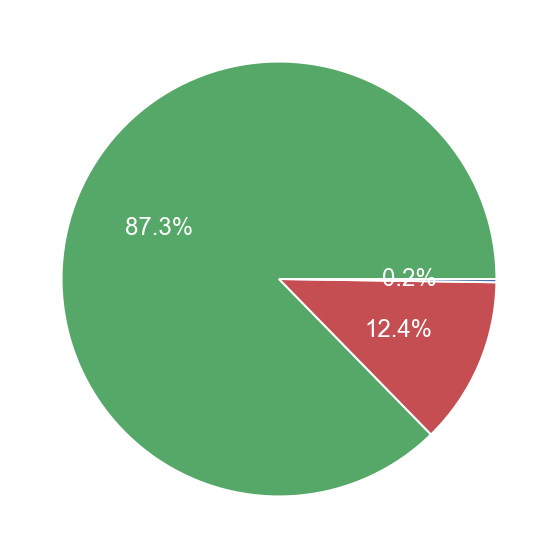

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Skilled Up

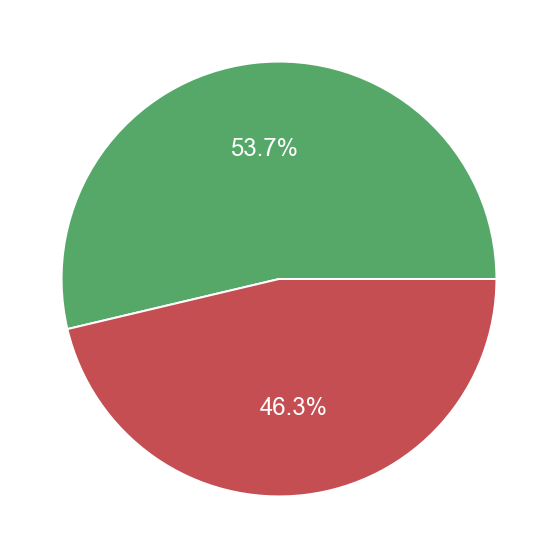

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Transmogrified

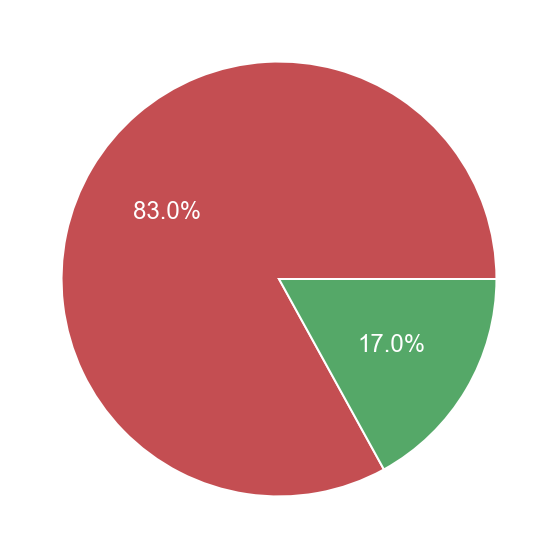

In [4]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Transmogrified"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_transmog.png", transparent=True, bbox_inches = "tight")
plt.show()

# Accuracy PvP, PvE, Other Pie

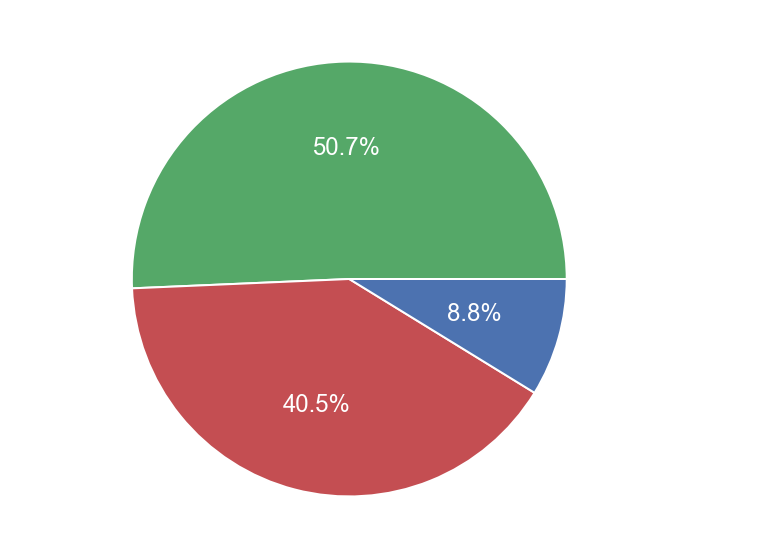

In [48]:
fig = plt.figure(figsize=(10, 10))
acc_pvp = df_stars6[df_stars6["Accuracy"] >= 85]
acc_pve = df_stars6[(df_stars6["Accuracy"] < 85) & (df_stars6["Accuracy"] >= 45)]
acc_other = df_stars6[df_stars6["Accuracy"] < 45]
acc_content = {
    'Over 85% [PvP]': acc_pvp.shape[0],
    'Between 45& and 85% [PvE]': acc_pve.shape[0],
    'Under 45% [Other]': acc_other.shape[0],
}
plt.pie(acc_content.values(), labels=acc_content.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_accuracy.png", transparent=True, bbox_inches = "tight")
plt.show()

# Tanky vs DMG Dealer

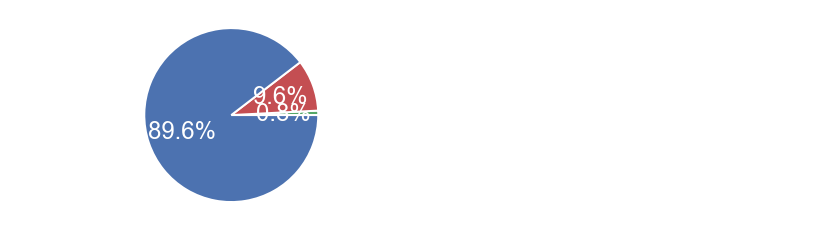

In [47]:
dmg_dealer_df = df_stars6[(df_stars6["Crit Rate"] > 60) & (df_stars6["Crit Dmg"] > 150)] # shows mons with 60%+ crit rate & 150%+ crit damage
pseudo_dmg_dealer_df = df_stars6[(df_stars6["Attack"] > 1500) & (df_stars6["Crit Rate"] < 60)]
pie_dmg_or_tanky = {
    'Damage Dealer [60%+ crit rate, 150% + crit dmg]': dmg_dealer_df.shape[0],
    'Pseudo - Damage Dealer': pseudo_dmg_dealer_df.shape[0],
    'Other [Tanky]': df_stars6.shape[0] - pseudo_dmg_dealer_df.shape[0] - dmg_dealer_df.shape[0],
}
plt.pie(pie_dmg_or_tanky.values(), labels=pie_dmg_or_tanky.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_is_tanky.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

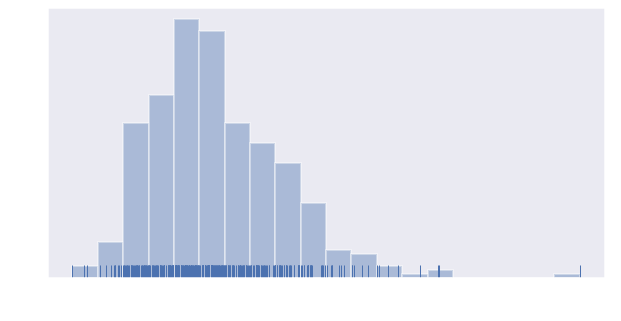

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

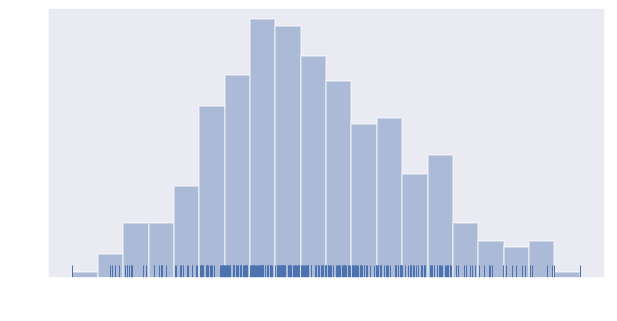

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Sets

Focus + Swift              47
Shield + Shield + Will     40
Violent + Will             33
Focus + Violent            23
Focus + Shield + Will      21
Energy + Swift             17
Shield + Will              16
Swift                      15
Shield + Violent           15
Shield + Swift             15
Violent                    15
Fight + Shield + Will      10
Swift + Will               10
Fight + Fight + Will        8
Revenge + Violent           7
Energy + Violent            6
Blade + Swift               5
Revenge + Swift             5
Blade + Violent             4
Fight + Swift               4
Fight + Fight + Focus       3
Nemesis + Violent           3
Guard + Shield + Will       2
Fight + Fight + Fight       2
Focus + Focus + Revenge     2
Guard + Swift               2
Fight + Fight + Shield      2
Fight + Violent             2
Fight + Fight               2
Guard + Violent             2
Energy + Shield + Will      2
Name: Sets, dtype: int64


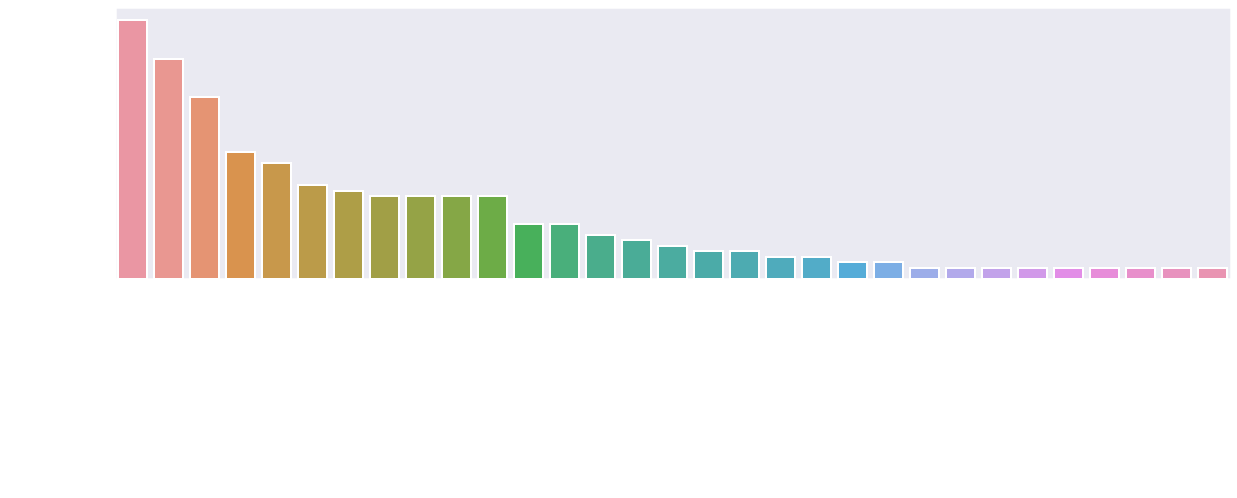

In [7]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 1]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# Eff. HP Distribution for most common set

Focus + Swift


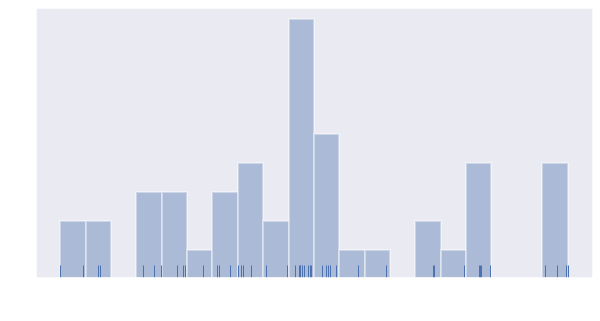

In [8]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_common_set_effhp.png", transparent=True, bbox_inches = "tight")

# Set for Highest Avg Eff

In [9]:
highest_effhp_set = df_stars6.iloc[:1]["Sets"].values[0]
print(highest_effhp_set)

Energy + Energy + Guard


# Eff. HP for set with Highest Eff

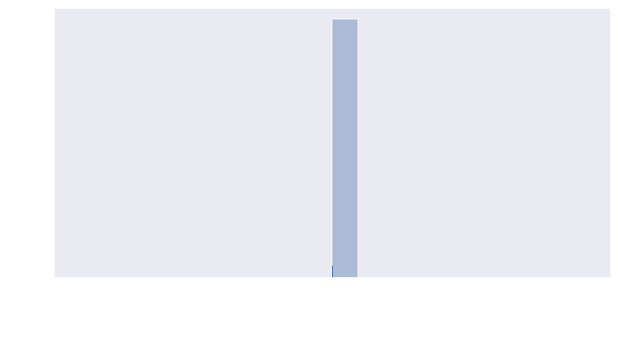

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == highest_effhp_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp_set.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution

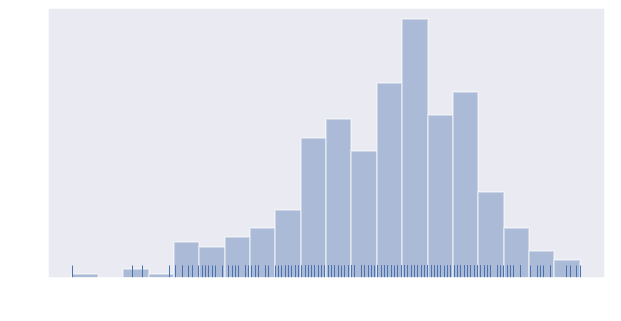

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation

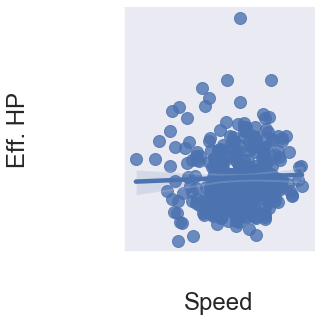

In [12]:
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_effhp.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Eff. HP

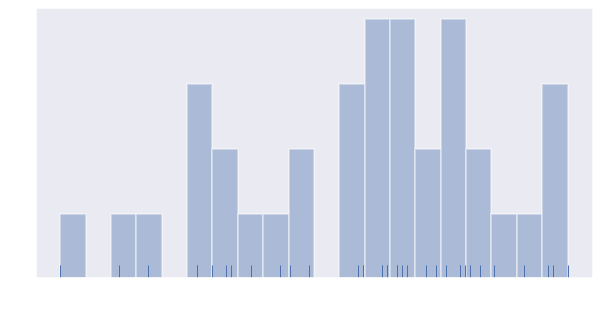

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

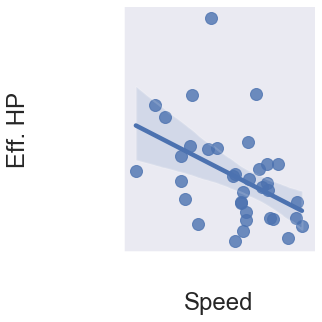

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [15]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B
ID,,,,,,,,,,,
1,46512,2129,1400,270,102,124,104,188,109,200559,123535


# First & last Monster

In [16]:
newest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].head(1).values[0]
oldest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].tail(1).values[0]
print(oldest, newest)

2015-06-03 18:16:04 2020-03-04 23:43:17


# Most common Builds

   Rune #2 Rune #4 Rune #6  Count
40     SPD     HP%    ACC%    128
43     SPD     HP%     HP%     47
34     SPD    DEF%    ACC%     24
19     SPD    ATK%    ACC%     24
29     SPD  CRate%    ACC%     17
25     SPD   CDmg%    ACC%     14
41     SPD     HP%    ATK%     11
23     SPD    ATK%     HP%     10
37     SPD    DEF%     HP%      9
16     HP%     HP%    ACC%      8
20     SPD    ATK%    ATK%      8
28     SPD   CDmg%     HP%      7
42     SPD     HP%    DEF%      7
18     HP%     HP%     HP%      4
26     SPD   CDmg%    ATK%      3
36     SPD    DEF%    DEF%      3
21     SPD    ATK%    DEF%      3
35     SPD    DEF%    ATK%      2
1     ATK%   CDmg%    ACC%      2
33     SPD  CRate%    RES%      2
32     SPD  CRate%     HP%      2
3     ATK%  CRate%    ACC%      2
14     HP%    DEF%    ACC%      2
13     HP%  CRate%     HP%      2
7     DEF%     HP%    ACC%      2
45     SPD     HP+    ACC%      2


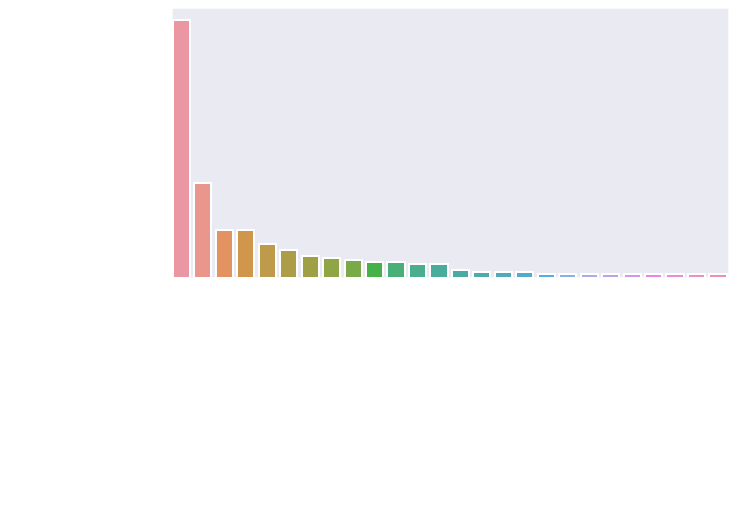

In [17]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

   Rune #2 Rune #4 Rune #6  Count
10     SPD     HP%    ACC%     13
13     SPD     HP%     HP%     11
2      SPD    ATK%     HP%      5
9      SPD    DEF%     HP%      3
11     SPD     HP%    ATK%      3
12     SPD     HP%    DEF%      3


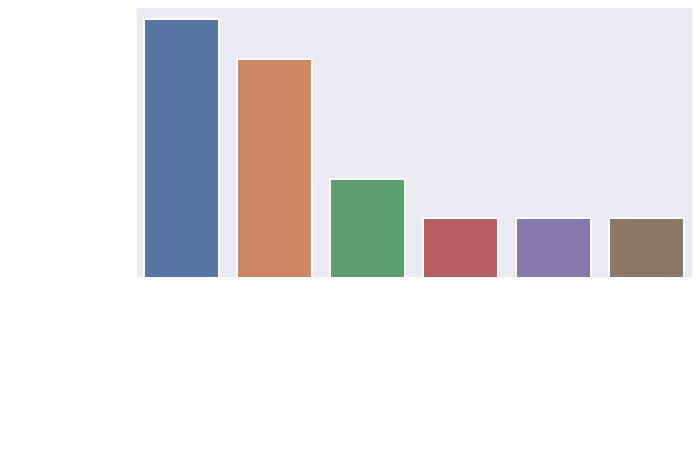

In [18]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

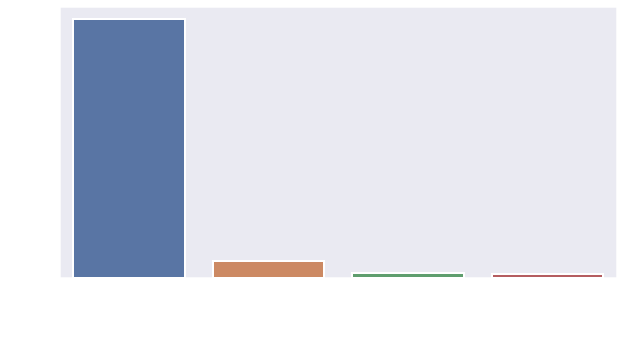

In [19]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 1]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

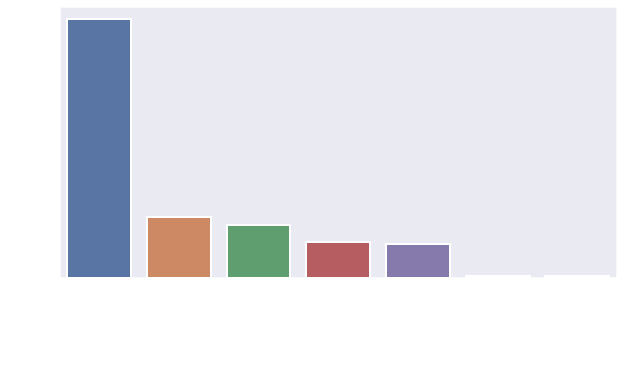

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 1]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

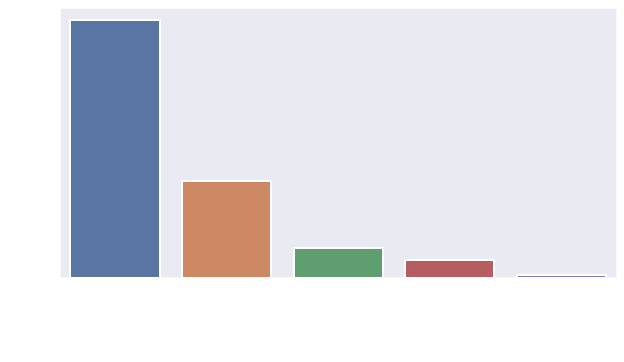

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 1]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")

# Speed Distribution for Will Sets

(149, 29)


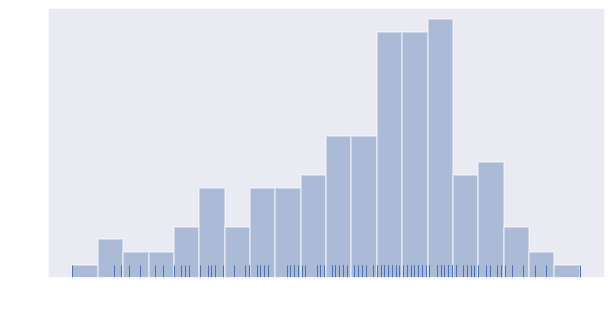

In [22]:
df_will_speed = df_stars6[df_stars6["Sets"].str.contains('Will')]
print(df_will_speed.shape)
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_will_speed["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_will.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for Non Will Sets

(216, 29)


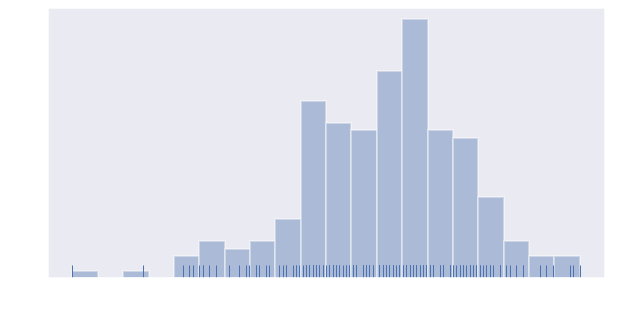

In [23]:
df_non_will_speed = df_stars6[~df_stars6.isin(df_will_speed)].dropna(how='all')
print(df_non_will_speed.shape)
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_non_will_speed["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_will_not.png", transparent=True,  bbox_inches = "tight")

# Accuracy Distribution

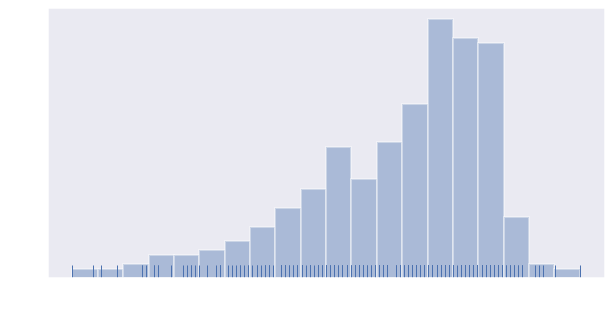

In [24]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Accuracy"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_accuracy.png", transparent=True,  bbox_inches = "tight")